In [1]:
%matplotlib inline

from helper_functions import tot_counts_norm, load_genes
import Fig1b_functions as helper

import numpy as np
import pandas as pd
import scipy.sparse
import matplotlib.pyplot as plt

### Load raw data and filter cells

In [2]:

# Data directory - for now, download from Dropbox and name folder "data"
# https://www.dropbox.com/sh/stbd49qaenebi5s/AAB_uivDy-w1H-cryYnpG1Bia?dl=0
# TO DO: upload files to server, add download link to website
data_dir = 'data'

# Load raw counts matrix
counts_raw = scipy.sparse.load_npz('{}/bBM.raw_counts.unfiltered.npz'.format(data_dir))

# Load gene names
genes = np.array(load_genes('{}/genes.txt'.format(data_dir)))

# Load 2-D embedding (SPRING)
spring_coords = np.loadtxt('{}/bBM.spring_coords.csv'.format(data_dir), delimiter=',')

# Load metadata (for filtering)
metadata = pd.read_csv('{}/bBM.raw.meta.csv'.format(data_dir))

# Filter cells as in final paper analyses
cell_mask = np.array(metadata['pass_filter'] == 1)
counts_raw = counts_raw[cell_mask, :]
metadata = metadata[cell_mask]

### Run total counts normalization

In [3]:
counts_norm = tot_counts_norm(counts_raw, exclude_dominant_frac=0.1)[0]

Excluded 8 genes from normalization


### Define cell type labels, markers, and colors

In [4]:
celltype_labels = ['E', 'GN', 'Ly', 'D', 'Meg', 'M', 'Ba', 'MPP']

marker_gene_sets = [
    ['Hbb-bt','Hba-a2','Hba-a1','Alas2','Bpgm'],
    ['Lcn2','S100a8','Ltf','Lyz2','S100a9'],
    ['Cd79a','Igll1','Vpreb3','Vpreb1','Lef1'],
    ['H2-Aa','Cd74','H2-Eb1','H2-Ab1','Cst3'],
    ['Pf4','Itga2b','Vwf','Pbx1','Mef2c'],
    ['Csf1r','Ly6c2','Ccr2'],
    ['Lmo4','Ifitm1','Ly6e','Srgn'],
    ['Hlf','Gcnt2']
]

color_list = [
    [1, 0.19, 0],
    [0, 0.35, 1],
    [0.02, 0.93, 0.95],
    [0, 0, 0.82],
    [0.5, 0, 0],
    [0.72, 1, 0.25],
    [1, 0.73, 0],
    [0.5, 0, 0.5]
]


### Calculate marker gene scores for each cell and cell type

In [5]:
scores = helper.get_marker_gene_scores(counts_norm, genes, celltype_labels, marker_gene_sets)

### Plot all scores on a single plot

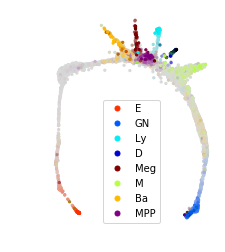

In [6]:
fig, ax = plt.subplots(figsize=(3,4))
ax = helper.plot_multiple_scores(scores, 
                                 spring_coords, 
                                 celltype_labels,
                                 color_list=color_list,
                                 legend_font_size=10,
                                 point_size=5,
                                 ax=ax)